In [305]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

,0,1,2,3
0,100.000000,100.000000,100.000000,100.000000
1,100.402868,101.985314,104.085510,107.158334
2,100.804736,102.914373,106.090981,109.152139
3,101.145685,104.066621,110.112712,106.752339
4,101.432141,105.636454,111.245058,107.098096
5,101.902155,107.252644,116.233009,111.501023


<Figure size 864x576 with 0 Axes>

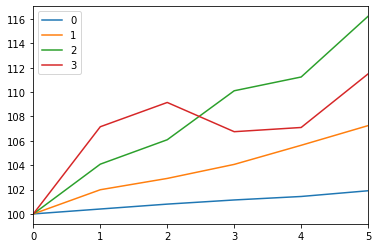

In [369]:
S0 = [
    [100],
    [100],
    [100],
    [100]
]

T = 1
dt = 0.2
n_time_steps = T / dt
n_assets = len(S0)

mu = np.matrix([
    [0.02], 
    [0.07], 
    [0.15], 
    [0.20],
])

sigma = np.diag([
    0.05, 
    0.12, 
    0.17, 
    0.25,
])

correlation_matrix = np.matrix([
    [1.00, 0.80, 0.30, 0.30],
    [0.80, 1.00, 0.60, 0.60],
    [0.30, 0.60, 1.00, 0.60],
    [0.30, 0.60, 0.60, 1.00],
])

covariance_matrix = sigma @ correlation_matrix @ sigma

L = np.linalg.cholesky(covariance_matrix)

plt.figure(figsize=(12, 8))

paths = [[s[0] for s in S0]]
for t in range(int(n_time_steps)):
    X = np.transpose(L @ np.random.normal(0, 1, n_assets))
    returns = np.diag(np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * (np.sqrt(dt) * X)))
    paths = np.concatenate((paths, [np.array(paths[-1]) * returns]), axis=0)
    
df = pd.DataFrame(paths)
display(df)
_ = df.plot();

In [353]:
X

matrix([[-0.10071971],
        [-0.15045036],
        [-0.06862439],
        [-0.01989806]])